In [6]:
!pip install supabase

In [7]:
!pip install pandas sqlalchemy psycopg2-binary

In [20]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import json
import numpy as np

In [30]:
# Substitua pelos dados que você pegou no "Project Settings > Database" do Supabase
USER = 'postgres'
PASSWORD = '_xs#hiUAWeN6LMK'
HOST = 'db.pthfxmypcxqjfstqwokf.supabase.co'
PORT = '5432'
DBNAME = 'postgres'

# Cria a string de conexão
url_conexao = f'postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}'
engine = create_engine(url_conexao)

# Lê a tabela inteira diretamente para o Pandas
query = "SELECT * FROM hrv_sessions"
df = pd.read_sql(query, engine)

In [31]:
# Filtrar dados para o usuário "TestMatrix"
df_filtered = df[df['user_name'] == 'TestMatrix'].copy()

In [32]:
print(df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 23 to 34
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id                    12 non-null     object             
 1   created_at            12 non-null     datetime64[ns, UTC]
 2   device_id             12 non-null     object             
 3   session_index         12 non-null     int64              
 4   timestamp_device_min  12 non-null     int64              
 5   fc_mean               0 non-null      object             
 6   sdnn                  0 non-null      object             
 7   rmssd                 0 non-null      object             
 8   pnn50                 0 non-null      object             
 9   rr_valid_count        0 non-null      object             
 10  tags                  12 non-null     object             
 11  rrr_intervals_ms      0 non-null      object             
 12  ir_waveform   

In [41]:
# Obter os primeiros 12 registros
data_to_plot = df_filtered.head(12)


In [51]:
# Extrair a tag de dentro da lista
data_to_plot['tags'] = data_to_plot['tags'].apply(
    lambda x: x[0] if isinstance(x, list) and len(x) > 0 else str(x)
)

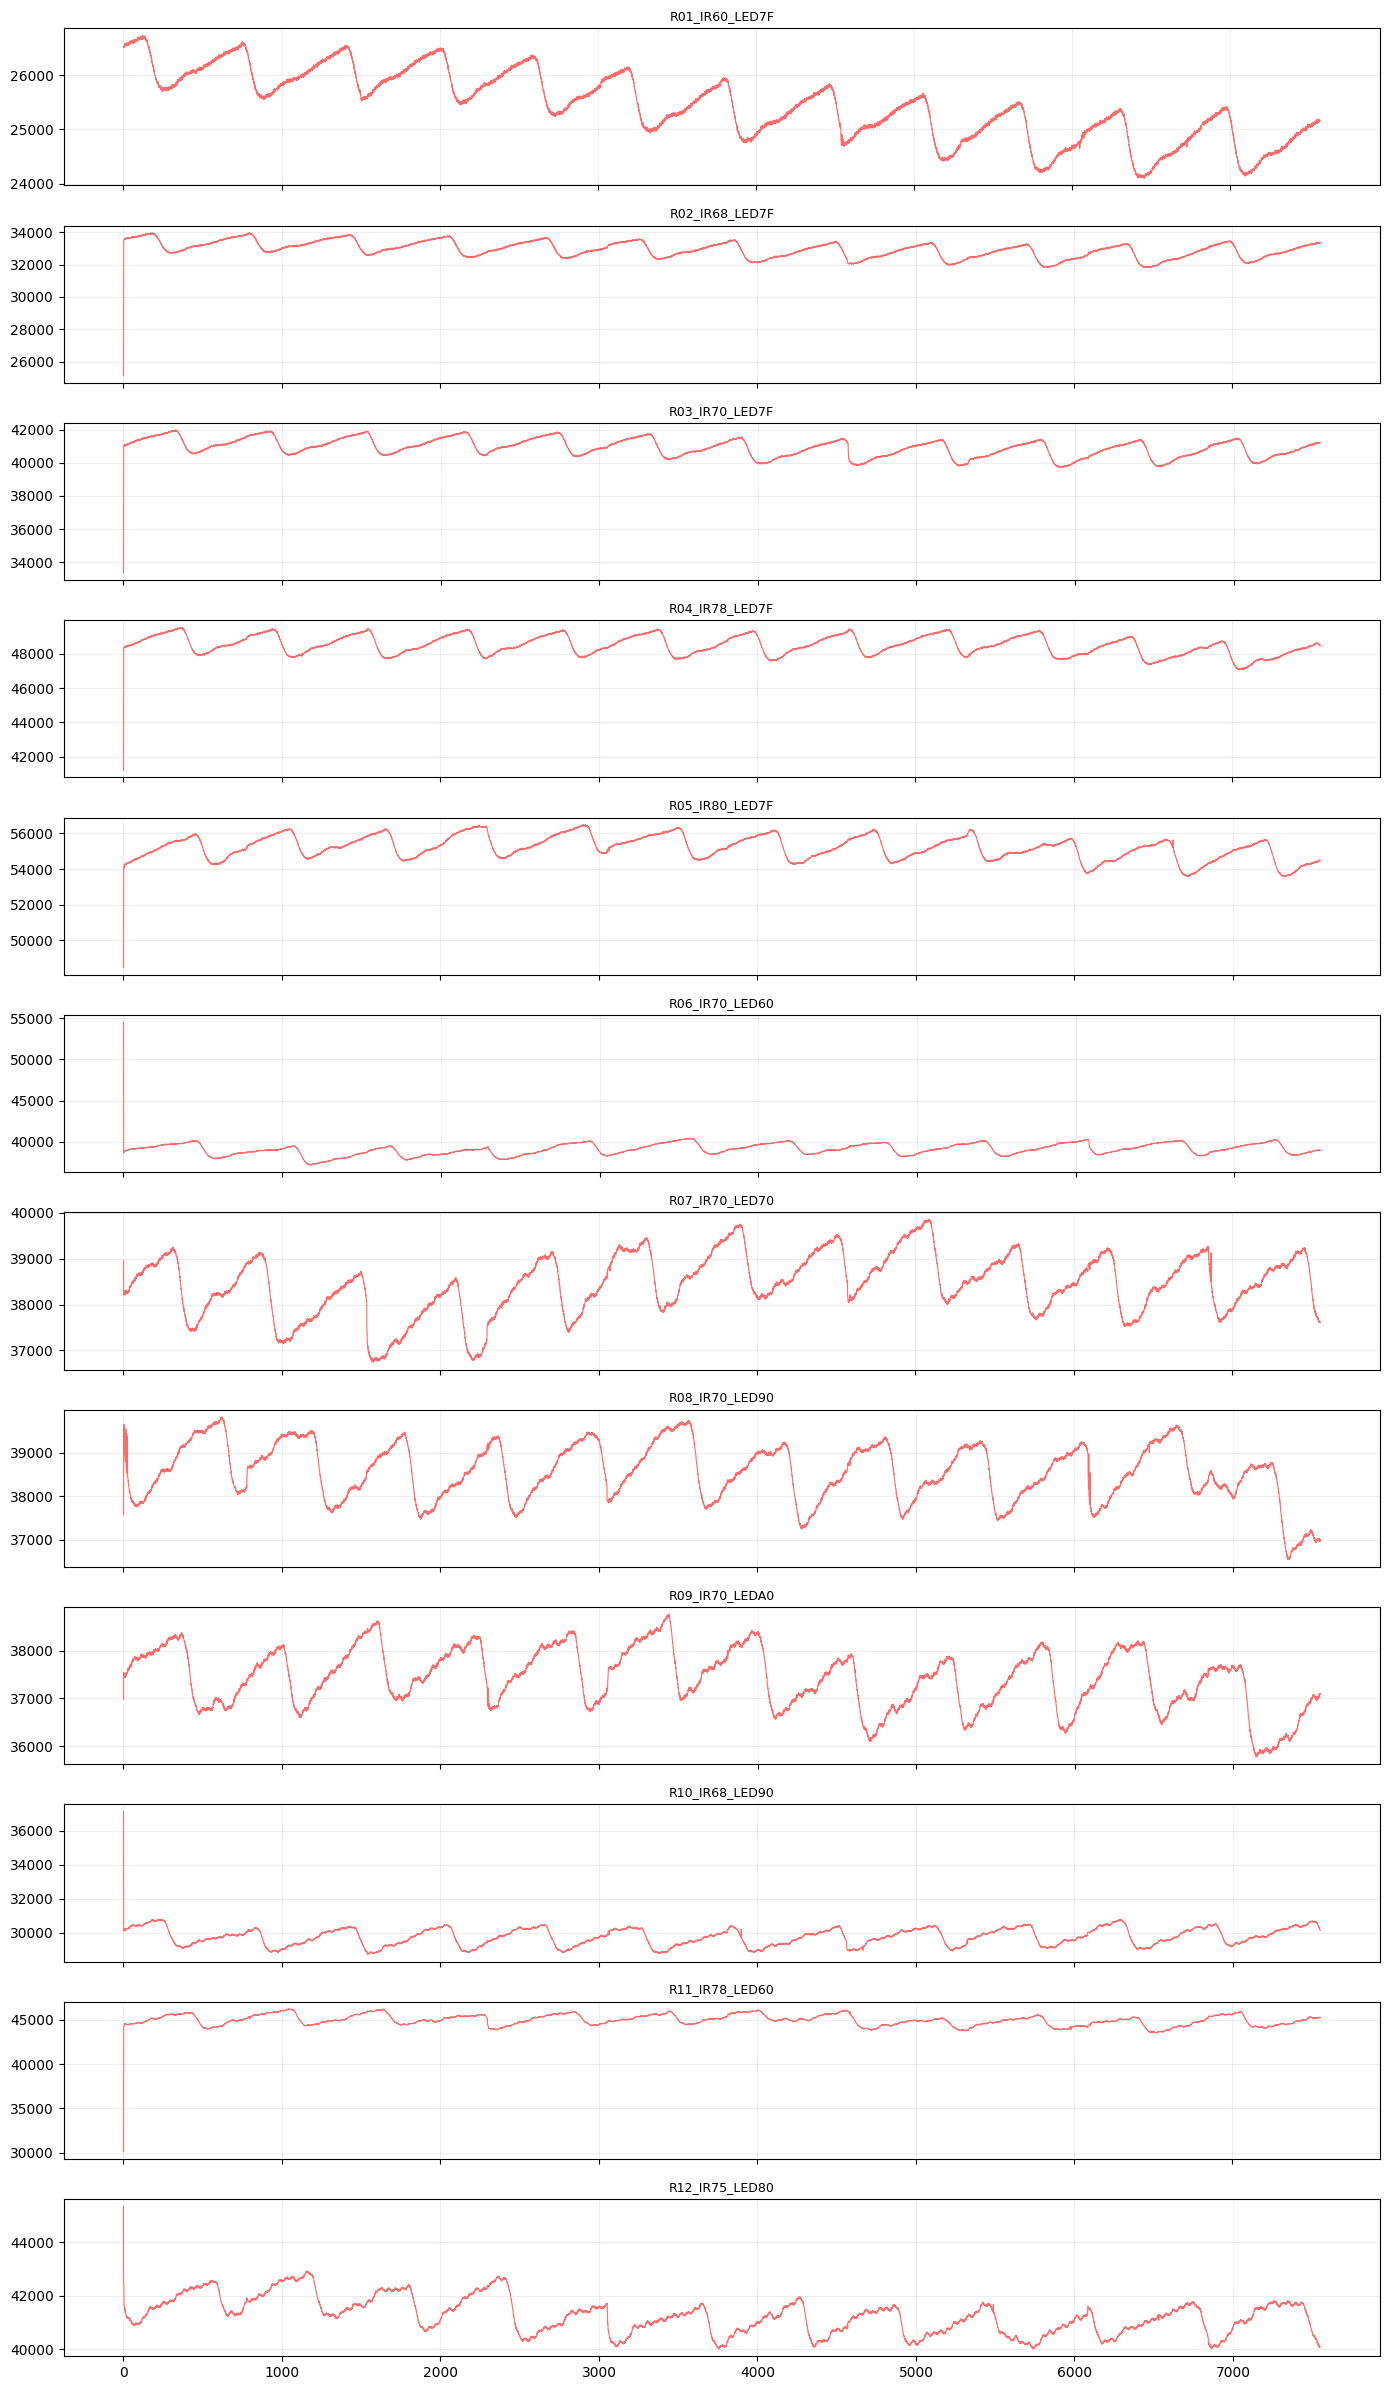

✅ Gráficos salvos! Total de séries plotadas: 12


In [52]:
# Plotar 12 gráficos em sequência vertical
fig, axes = plt.subplots(12, 1, figsize=(14, 24))

for idx, (_, row) in enumerate(data_to_plot.iterrows()):
    ir_values = row['ir_waveform']
    axes[idx].plot(ir_values, linewidth=0.8, color='#FF6B6B')
    axes[idx].set_title(row['tags'], fontsize=9)
    axes[idx].grid(True, alpha=0.2)
    
    # Remover labels do eixo x de todos exceto o último
    if idx < 11:
        axes[idx].set_xticklabels([])

plt.tight_layout()
plt.savefig('max30102_12_graficos.png', dpi=200, bbox_inches='tight')
plt.show()

print(f"✅ Gráficos salvos! Total de séries plotadas: {len(data_to_plot)}")